In [1]:
import pandas as pd

# load the training dataset
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
  Label: 0
Patient 2 
  Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
  Label: 0
Patient 3 
  Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
  Label: 0
Patient 4 
  Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
  Label: 1


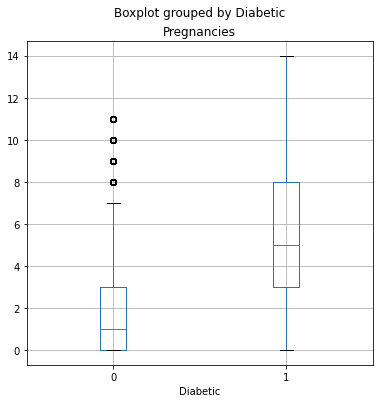

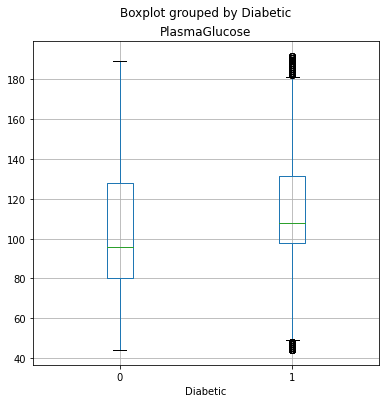

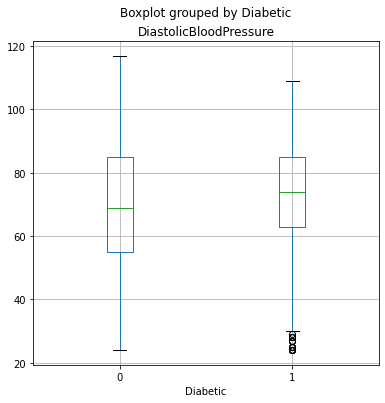

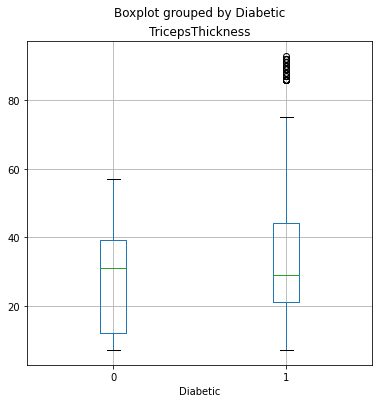

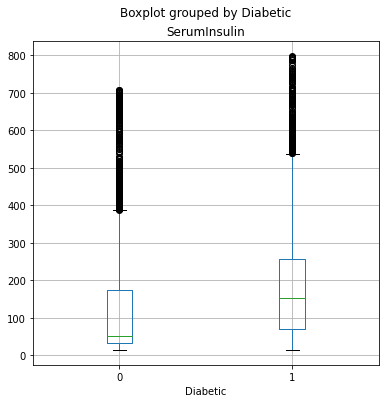

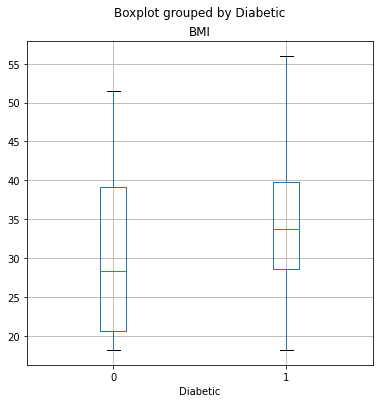

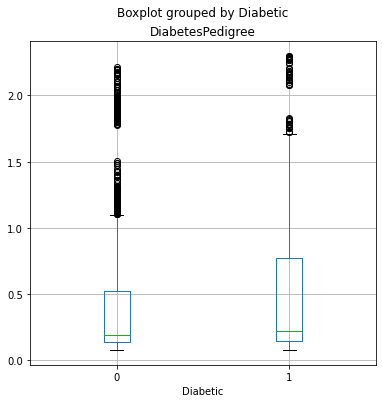

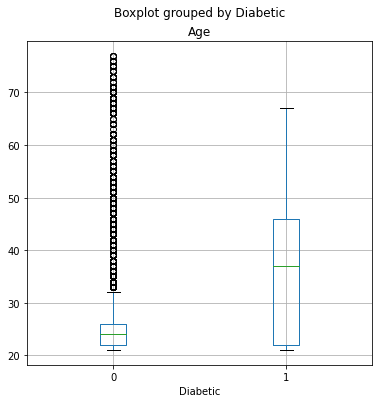

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
for col in features:
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,6))
    plt.title(col)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.size, X_test.size))

Training cases: 84000
Test cases: 36000


In [5]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [6]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]


In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7888888888888889


In [8]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



In [9]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7231012658227848
Overall Recall: 0.6036988110964333


In [10]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2636  350]
 [ 600  914]]


In [11]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.81673207 0.18326793]
 [0.96317765 0.03682235]
 [0.80900436 0.19099564]
 ...
 [0.60687512 0.39312488]
 [0.10608747 0.89391253]
 [0.63834077 0.36165923]]


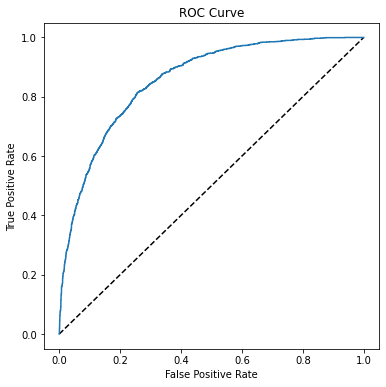

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568307761185843


In [14]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202425055366257


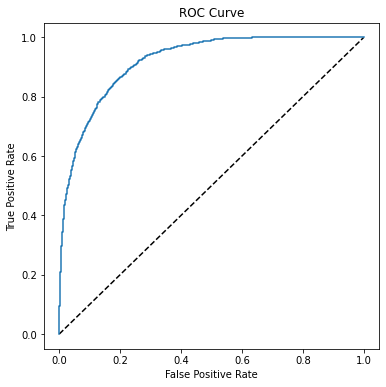

In [15]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline

Confusion Matrix:
 [[2859  127]
 [ 176 1338]] 

Accuracy: 0.9326666666666666
Overall Precision: 0.9133105802047782
Overall Recall: 0.8837516512549538

AUC: 0.9822523825408046


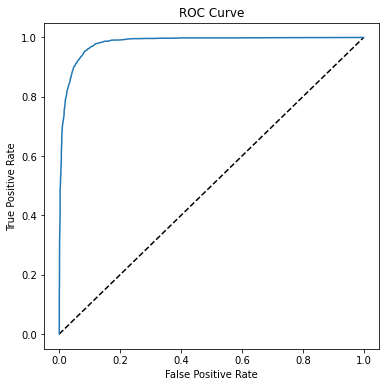

In [17]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample

X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

In [19]:
import pandas as pd

# load the training dataset
penguins = pd.read_csv('penguins.csv')

# Display a random sample of 10 observations
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
47,37.5,18.9,179.0,2975.0,0
263,49.8,15.9,229.0,5950.0,1
115,42.7,18.3,196.0,4075.0,0
173,45.1,14.5,215.0,5000.0,1
124,35.2,15.9,186.0,3050.0,0
61,41.3,21.1,195.0,4400.0,0
15,36.6,17.8,185.0,3700.0,0
6,38.9,17.8,181.0,3625.0,0
80,34.6,17.2,189.0,3200.0,0
285,51.3,19.9,198.0,3700.0,2


In [20]:
penguin_classes = ['Amelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], int(row[4]),']',penguin_classes[int(row[4])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 35.5 17.5 190.0 3700.0 0 ] Amelie
[ 45.5 15.0 220.0 5000.0 1 ] Gentoo
[ 34.5 18.1 187.0 2900.0 0 ] Amelie
[ 50.5 19.6 201.0 4050.0 2 ] Chinstrap
[ 40.2 17.0 176.0 3450.0 0 ] Amelie
[ 39.0 18.7 185.0 3650.0 0 ] Amelie
[ 45.8 18.9 197.0 4150.0 0 ] Amelie
[ 51.4 19.0 201.0 3950.0 2 ] Chinstrap
[ 34.0 17.1 185.0 3400.0 0 ] Amelie
[ 46.4 15.0 216.0 4700.0 1 ] Gentoo


In [21]:
# Count the number of null values for each column
penguins.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [22]:
# Show rows containing nulls
penguins[penguins.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


In [23]:
# Drop rows containing NaN values
penguins=penguins.dropna()
#Confirm there are now no nulls
penguins.isnull().sum()


CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

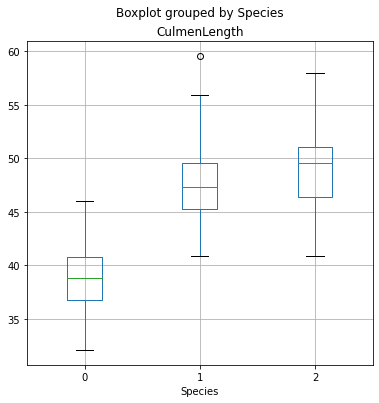

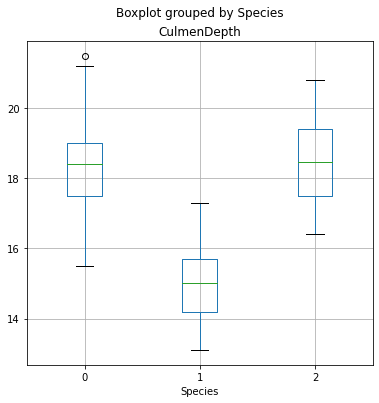

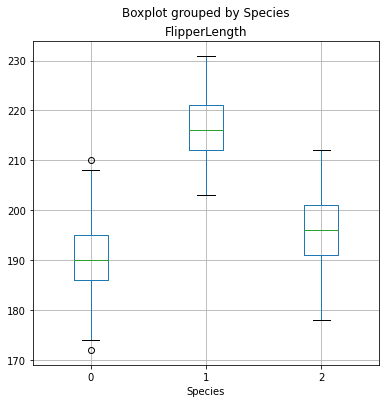

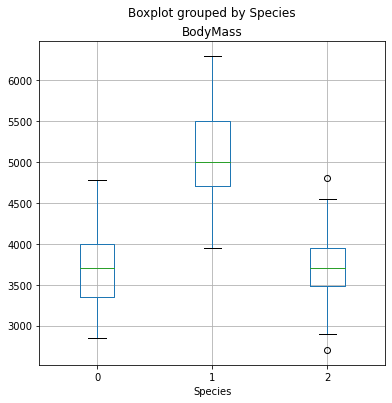

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

penguin_features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
penguin_label = 'Species'
for col in penguin_features:
    penguins.boxplot(column=col, by=penguin_label, figsize=(6,6))
    plt.title(col)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# Separate features and labels
penguins_X, penguins_y = penguins[penguin_features].values, penguins[penguin_label].values

# Split data 70%-30% into training set and test set
x_penguin_train, x_penguin_test, y_penguin_train, y_penguin_test = train_test_split(penguins_X, penguins_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=penguins_y)

print ('Training Set: %d, Test Set: %d \n' % (x_penguin_train.size, x_penguin_test.size))

Training Set: 956, Test Set: 412 



### Train and evaluate a multiclass classifier

In [26]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_penguin_train, y_penguin_train)
print (multi_model)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [27]:
penguin_predictions = multi_model.predict(x_penguin_test)
print('Predicted labels: ', penguin_predictions[:15])
print('Actual labels   : ' ,y_penguin_test[:15])

Predicted labels:  [0 1 0 2 2 1 1 1 0 2 2 1 2 1 2]
Actual labels   :  [0 1 2 2 2 1 1 1 0 2 2 1 2 1 2]


In [28]:
from sklearn. metrics import classification_report

print(classification_report(y_penguin_test, penguin_predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      1.00      1.00        37
           2       0.95      0.90      0.93        21

    accuracy                           0.97       103
   macro avg       0.97      0.96      0.96       103
weighted avg       0.97      0.97      0.97       103



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))

Overall Accuracy: 0.970873786407767
Overall Precision: 0.9688405797101449
Overall Recall: 0.9608465608465608


 confusion matrix for our model:

In [30]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_penguin_test, penguin_predictions)
print(mcm)

[[44  0  1]
 [ 0 37  0]
 [ 2  0 19]]


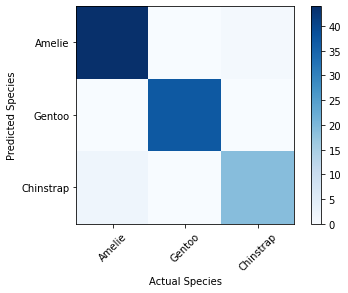

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")
plt.show()

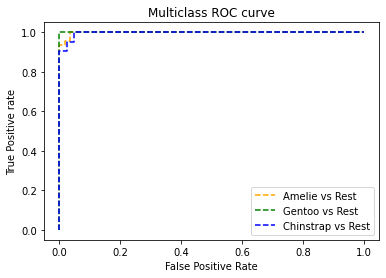

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(penguin_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_penguin_test, penguin_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=penguin_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=penguin_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=penguin_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [33]:
auc = roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9981999902100828


### Preprocess data in a pipeline

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVC(probability=True))])


# fit the pipeline to train a linear regression model on the training set
multi_model = pipeline.fit(x_penguin_train, y_penguin_train)
print (multi_model)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('preprocess',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0, 1, 2, 3])],
                                   verbose=False)),
                ('regressor',
                 SVC(C=1.0, break_

Now we can evaluate the new model.

Overall Accuracy: 0.9805825242718447
Overall Precision: 0.9767195767195768
Overall Recall: 0.9767195767195768
Average AUC: 0.9990361381446328


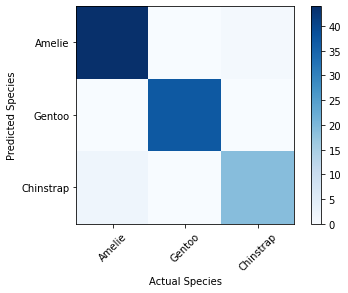

In [35]:
# Get predictions from test data
penguin_predictions = multi_model.predict(x_penguin_test)
penguin_prob = multi_model.predict_proba(x_penguin_test)

# Overall metrics
print("Overall Accuracy:",accuracy_score(y_penguin_test, penguin_predictions))
print("Overall Precision:",precision_score(y_penguin_test, penguin_predictions, average='macro'))
print("Overall Recall:",recall_score(y_penguin_test, penguin_predictions, average='macro'))
print('Average AUC:', roc_auc_score(y_penguin_test,penguin_prob, multi_class='ovr'))

# Confusion matrix
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Actual Species")
plt.ylabel("Predicted Species")
plt.show()

In [38]:
# This time our input is an array of two feature arrays
x_new = np.array([[49.5,18.4,195, 3600],
         [38.2,20.1,190,3900]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = multi_model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + penguin_classes[prediction] +')')

New samples:
[[  49.5   18.4  195.  3600. ]
 [  38.2   20.1  190.  3900. ]]
2 (Chinstrap)
0 (Amelie)
